In [8]:
import torch

ssd_model = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd')
utils = torch.hub.load('NVIDIA/DeepLearningExamples:torchhub', 'nvidia_ssd_processing_utils')

ssd_model.to('cuda')
ssd_model.eval()

inputs = [utils.prepare_input('../data/img_5_1/img_5_1_0775.jpg')]

tensor = utils.prepare_tensor(inputs)
print(tensor.shape)
with torch.no_grad():
    detections_batch = ssd_model(tensor)

results_per_input = utils.decode_results(detections_batch)
best_results_per_input = [utils.pick_best(results, 0.40) for results in results_per_input]

Using cache found in /home/sach/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub
Using cache found in /home/sach/.cache/torch/hub/NVIDIA_DeepLearningExamples_torchhub


torch.Size([1, 3, 300, 300])


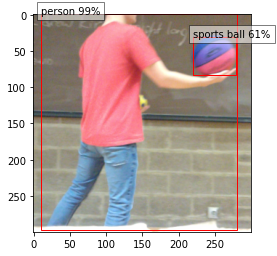

In [7]:
from matplotlib import pyplot as plt
import matplotlib.patches as patches

classes_to_labels = utils.get_coco_object_dictionary()

for image_idx in range(len(best_results_per_input)):
    fig, ax = plt.subplots(1)
    # Show original, denormalized image...
    image = inputs[image_idx] / 2 + 0.5
    ax.imshow(image)
    # ...with detections
    bboxes, classes, confidences = best_results_per_input[image_idx]
    for idx in range(len(bboxes)):
        left, bot, right, top = bboxes[idx]
        x, y, w, h = [val * 300 for val in [left, bot, right - left, top - bot]]
        rect = patches.Rectangle((x, y), w, h, linewidth=1, edgecolor='r', facecolor='none')
        ax.add_patch(rect)
        ax.text(x, y, "{} {:.0f}%".format(classes_to_labels[classes[idx] - 1], confidences[idx]*100), bbox=dict(facecolor='white', alpha=0.5))
plt.show()